# Stage 4 Alyiah Proctor

In [1]:
import pandas as pd
import scipy.stats as stats
pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image

Reading in the data 

In [2]:
cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
deaths =  pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")

Sectioning out the state data. We will be analyzing Arizona 

In [3]:
deaths = deaths.drop(deaths.index[cases['countyFIPS'] == 0])
cases = cases.drop(cases.index[cases['countyFIPS'] == 0])

#getting only arizona cases and deaths
cases = cases.groupby('State')
chunks = dict(list(cases))
AZ_cases = chunks['AZ']

deaths = deaths.groupby('State')
chunks = dict(list(deaths))
AZ_deaths = chunks['AZ']

## Task 1

The first day of infections in the state is 1/26/2020. So will drop the days before that

In [4]:
AZ_cases = AZ_cases.drop(['2020-01-22','2020-01-23','2020-01-24','2020-01-25'],axis =1)
AZ_deaths = AZ_deaths.drop(['2020-01-22','2020-01-23','2020-01-24','2020-01-25'],axis =1)

In [5]:
AZ_cases

,countyFIPS,County Name,State,StateFIPS,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
99,4001,Apache County,AZ,4,0,0,0,0,0,0,...,11827,11827,11871,11875,11890,11918,11965,11965,11965,12067
100,4003,Cochise County,AZ,4,0,0,0,0,0,0,...,12477,12477,12530,12545,12564,12586,12604,12604,12604,12663
101,4005,Coconino County,AZ,4,0,0,0,0,0,0,...,18791,18791,18893,18945,18958,19007,19069,19069,19069,19204
102,4007,Gila County,AZ,4,0,0,0,0,0,0,...,7441,7441,7495,7520,7544,7554,7590,7590,7590,7644
103,4009,Graham County,AZ,4,0,0,0,0,0,0,...,5719,5719,5740,5750,5756,5781,5792,5792,5792,5838
104,4011,Greenlee County,AZ,4,0,0,0,0,0,0,...,626,626,631,635,638,640,643,643,643,651
105,4012,La Paz County,AZ,4,0,0,0,0,0,0,...,2600,2600,2603,2605,2609,2614,2622,2622,2622,2628
106,4013,Maricopa County,AZ,4,1,1,1,1,1,1,...,591728,591728,597401,598994,600368,602308,604387,604387,604387,610724
107,4015,Mohave County,AZ,4,0,0,0,0,0,0,...,25954,25954,26141,26265,26381,26500,26641,26641,26641,26890
108,4017,Navajo County,AZ,4,0,0,0,0,0,0,...,17455,17455,17526,17544,17568,17660,17685,17685,17685,17774


Getting the new cases and deaths per day 

In [6]:
AZ_new_cases = pd.DataFrame()
for column in range(5,573):
  AZ_new_cases[column] = AZ_cases.iloc[:,column] - AZ_cases.iloc[:,column-1] 

AZ_new_deaths = pd.DataFrame()
for column in range(5,573):
  AZ_new_deaths[column] = AZ_deaths.iloc[:,column] - AZ_deaths.iloc[:,column-1] 

C:\Users\alyia\AppData\Local\Temp\ipykernel_49320\2468001699.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  AZ_new_cases[column] = AZ_cases.iloc[:,column] - AZ_cases.iloc[:,column-1]
C:\Users\alyia\AppData\Local\Temp\ipykernel_49320\2468001699.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  AZ_new_deaths[column] = AZ_deaths.iloc[:,column] - AZ_deaths.iloc[:,column-1]


In [7]:
#adding in the county identifiers 
#AZ_new_cases = AZ_new_cases.join(AZ_cases['County Name'])
AZ_new_cases.head()

,5,6,7,8,9,10,11,12,13,14,...,563,564,565,566,567,568,569,570,571,572
99,0,0,0,0,0,0,0,0,0,0,...,0,0,44,4,15,28,47,0,0,102
100,0,0,0,0,0,0,0,0,0,0,...,0,0,53,15,19,22,18,0,0,59
101,0,0,0,0,0,0,0,0,0,0,...,0,0,102,52,13,49,62,0,0,135
102,0,0,0,0,0,0,0,0,0,0,...,0,0,54,25,24,10,36,0,0,54
103,0,0,0,0,0,0,0,0,0,0,...,0,0,21,10,6,25,11,0,0,46


Getting the sum of all of the new cases 

In [8]:
AZ_new_cases.sum(axis = 1)

99      12067
100     12663
101     19204
102      7644
103      5838
104       651
105      2628
106    610723
107     26890
108     17774
109    123403
110     59552
111      8346
112     22186
113     38292
dtype: int64

Based on this the counties most at risk are 109,106,101,100,and 99. So we will filter out these counties from our table 

In [9]:
AZ_sums_c = AZ_new_cases.iloc[[0,1,2,7,10]]
AZ_sums_d = AZ_new_deaths.iloc[[0,1,2,7,10]]
AZ_sums_c

,5,6,7,8,9,10,11,12,13,14,...,563,564,565,566,567,568,569,570,571,572
99,0,0,0,0,0,0,0,0,0,0,...,0,0,44,4,15,28,47,0,0,102
100,0,0,0,0,0,0,0,0,0,0,...,0,0,53,15,19,22,18,0,0,59
101,0,0,0,0,0,0,0,0,0,0,...,0,0,102,52,13,49,62,0,0,135
106,0,0,0,0,0,0,0,0,0,0,...,0,0,5673,1593,1374,1940,2079,0,0,6337
109,0,0,0,0,0,0,0,0,0,0,...,0,0,489,242,56,295,272,0,0,768


## fitting regression

In [10]:
data_c = AZ_sums_c.T
data_d = AZ_sums_d.T
data_c

,99,100,101,106,109
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0
...,...,...,...,...,...
568,28,22,49,1940,295
569,47,18,62,2079,272
570,0,0,0,0,0
571,0,0,0,0,0


#### Apache county 

#### cases

In [11]:
import statsmodels.formula.api as smf

# create a fitted model for Apache county 
apache_rg_c = smf.ols(formula= 'data_c[99] ~ 1 + data_c.index', data= data_c).fit()
# print the coefficients
apache_rg_c.params

Intercept       18.659193
data_c.index     0.008962
dtype: float64

So for one new case our days increase by .0089. Meaning Apache will have 1000 new cases every 8 days. 

In [12]:
#2-nd order polynomial
apache_poly_c = smf.ols(formula='data_c[99] ~ 1 + data_c.index+ I(data_c.index ** 2.0)', data=data_c).fit()
apache_poly_c.params

Intercept                -8.230718
data_c.index              0.284318
I(data_c.index ** 2.0)   -0.000477
dtype: float64

With a polynomial regression we get that for every new case we can expect a negative amount of days to pass. This model does not seem correct and the linear model seems to logically fit better. 

#### deaths

In [13]:
# create a fitted model for Apache county 
apache_rg_d = smf.ols(formula= 'data_d[99] ~ data_d.index', data= data_d).fit()
# print the coefficients
apache_rg_d.params

Intercept       0.721247
data_d.index    0.000197
dtype: float64

So for one new case our days increase by .0002. Meaning Apache will have 10000 new deaths every ~2 days. 

In [14]:
#2-nd order polynomial
apache_poly_2_d = smf.ols(formula='data_d[99] ~ 1 + data_d.index+ I(data_d.index ** 2.0)', data=data_d).fit()
apache_poly_2_d.params

Intercept                -0.332510
data_d.index              0.010988
I(data_d.index ** 2.0)   -0.000019
dtype: float64

With a polynomial regression we see that for one new death our days increase by .011. Meaning Apache will have 100 new deaths aproximatley every day. 

#### Cochise County


#### cases

In [15]:
# create a fitted model for Cochise county 
cochise_rg_c = smf.ols(formula= 'data_c[100] ~ 1 + data_c.index', data= data_c).fit()
# print the coefficients
cochise_rg_c.params

Intercept       12.564219
data_c.index     0.033725
dtype: float64

For one new case our days increase by .033. Meaning Cochise has 100 new cases every 3 days. 

In [16]:
#2-nd order polynomial
cochise_poly_c = smf.ols(formula='data_c[100] ~ 1 + data_c.index+ I(data_c.index ** 2.0)', data=data_c).fit()
cochise_poly_c.params

Intercept                -25.790185
data_c.index               0.426479
I(data_c.index ** 2.0)    -0.000681
dtype: float64

With polynomial regression, for one new case our days increase by .42. Meaning Cochise has 10 new cases every 4 days. 

#### deaths 

In [17]:
# create a fitted model for cochise county 
cochise_rg_d = smf.ols(formula= 'data_d[100] ~ data_d.index', data= data_d).fit()
# print the coefficients
cochise_rg_d.params

Intercept       0.306034
data_d.index    0.000770
dtype: float64

For one new death our days increase by .0008. Meaning Cochise has 10000 new deaths every 8 days. 

In [18]:
#2-nd order polynomial
cochise_poly_2_d = smf.ols(formula='data_d[100] ~ 1 + data_d.index+ I(data_d.index ** 2.0)', data=data_d).fit()
cochise_poly_2_d.params

Intercept                -0.560340
data_d.index              0.009642
I(data_d.index ** 2.0)   -0.000015
dtype: float64

With polynomial regression, for one new death our days increase by .0096. Meaning Cochise has 1000 new deaths ~ every 9 days. 

### Coconino County

#### cases

In [19]:
# create a fitted model for Cochise county 
coconino_rg_c = smf.ols(formula= 'data_c[101] ~ 1 + data_c.index', data= data_c).fit()
# print the coefficients
coconino_rg_c.params

Intercept       22.435542
data_c.index     0.039426
dtype: float64

For one new case our days increase by .039. Meaning coconino has 100 new cases every 3 days. 

In [20]:
#2-nd order polynomial
coconino_poly_c = smf.ols(formula='data_c[101] ~ 1 + data_c.index+ I(data_c.index ** 2.0)', data=data_c).fit()
coconino_poly_c.params

Intercept                -25.397383
data_c.index               0.529241
I(data_c.index ** 2.0)    -0.000849
dtype: float64

With polynomial regression, for one new case our days increase by .52. Meaning coconino has 10 new cases every 5 days. 

#### deaths 

In [21]:
# create a fitted model for cochise county 
coconino_rg_d = smf.ols(formula= 'data_d[101] ~ data_d.index', data= data_d).fit()
# print the coefficients
coconino_rg_d.params

Intercept       0.728594
data_d.index   -0.000475
dtype: float64

For one new death our days decrease by .00004. Meaning coconino has a decrease of  10000 new deaths every 4 days. This model does not make much sense 

In [22]:
#2-nd order polynomial
coconino_poly_2_d = smf.ols(formula='data_d[101] ~ 1 + data_d.index+ I(data_d.index ** 2.0)', data=data_d).fit()
coconino_poly_2_d.params

Intercept                 0.059286
data_d.index              0.006379
I(data_d.index ** 2.0)   -0.000012
dtype: float64

With polynomial regression, for one new death our days increase by .0066. Meaning coconino has 1000 new deaths ~ every 6 days. 

### Maricopa County 

#### cases

In [23]:
# create a fitted model for Maricopa county 
Maricopa_rg_c = smf.ols(formula= 'data_c[106] ~ 1 + data_c.index', data= data_c).fit()
# print the coefficients
Maricopa_rg_c.params

Intercept       611.531842
data_c.index      1.607226
dtype: float64

For one new case our days increase by 1.6 Meaning Maricopa has 1 new cases ~ every 2 days. 

In [24]:
#2-nd order polynomial
Maricopa_poly_c = smf.ols(formula='data_c[106] ~ 1 + data_c.index+ I(data_c.index ** 2.0)', data=data_c).fit()
Maricopa_poly_c.params

Intercept                -721.338395
data_c.index               15.255976
I(data_c.index ** 2.0)     -0.023655
dtype: float64

With polynomial regression, for one new case our days increase by 15. Meaning Maricopa has 1 new cases ~ every 15 days. 

#### deaths 

In [25]:
# create a fitted model for cochise county 
Maricopa_rg_d = smf.ols(formula= 'data_d[106] ~ data_d.index', data= data_d).fit()
# print the coefficients
Maricopa_rg_d.params

Intercept       13.279851
data_d.index     0.018582
dtype: float64

For one new death our days increase by .0208. Meaning Maricopa has an increase of 100 new deaths every 2 days.

In [26]:
#2-nd order polynomial
Maricopa_poly_2_d = smf.ols(formula='data_d[106] ~ 1 + data_d.index+ I(data_d.index ** 2.0)', data=data_d).fit()
Maricopa_poly_2_d.params

Intercept                -13.351960
data_d.index               0.291295
I(data_d.index ** 2.0)    -0.000473
dtype: float64

With polynomial regression, for one new death our days increase by .29 . Meaning Maricopa has 10 new deaths ~ every 3 days. 

### Pima County

In [27]:
# create a fitted model for Pima county 
Pima_rg_c = smf.ols(formula= 'data_c[109] ~ 1 + data_c.index', data= data_c).fit()
# print the coefficients
Pima_rg_c.params

Intercept       134.447201
data_c.index      0.287042
dtype: float64

For one new case our days increase by .287 Meaning Maricopa has 10 new cases ~ every 3 days. 

In [28]:
#2-nd order polynomial
Pima_poly_c = smf.ols(formula='data_c[109] ~ 1 + data_c.index+ I(data_c.index ** 2.0)', data=data_c).fit()
Pima_poly_c.params

Intercept                -215.604205
data_c.index                3.871610
I(data_c.index ** 2.0)     -0.006212
dtype: float64

With polynomial regression, for one new case our days increase by 3. Meaning Pima has 1 new cases ~ every 3 days. 

#### deaths 

In [29]:
# create a fitted model for cochise county 
Pima_rg_d = smf.ols(formula= 'data_d[109] ~ data_d.index', data= data_d).fit()
# print the coefficients
Pima_rg_d.params

Intercept       2.964206
data_d.index    0.004799
dtype: float64

For one new death our days increase by .0047. Meaning Pima has an increase of 100 new deaths every 4 days.

In [30]:
#2-nd order polynomial
Pima_poly_2_d = smf.ols(formula='data_d[109] ~ 1 + data_d.index+ I(data_d.index ** 2.0)', data=data_d).fit()
Pima_poly_2_d.params

Intercept                -3.602555
data_d.index              0.072043
I(data_d.index ** 2.0)   -0.000117
dtype: float64

With polynomial regression, for one new death our days increase by .072 . Meaning Pima has 10 new deaths ~ every 7 days. 

### Point of no return 

First we need to get data for Arizona new deaths as a whole 

We will use the column total_beds_7_day_avg to determine the capacity of hospital beds. The description of the column reads 
-  Average of total number of all staffed inpatient and outpatient beds in the hospital, including all overflow, observation, and active surge/expansion beds used for inpatients and for outpatients (including all ICU, ED, and observation) reported during the 7-day period.
<br><br><br>
So we will get that column for all Arizona hospitals

In [31]:
hospital_beds = pd.read_csv("../../../../data/stage_1/Weekly_Hospital_Capacity.csv")
hospital_beds = hospital_beds[['state','total_beds_7_day_avg']]

#getting only arizona values
beds = hospital_beds.groupby('state')
chunks = dict(list(beds))
AZ_beds = chunks['AZ']
AZ_beds

,state,total_beds_7_day_avg
111,AZ,22.0
113,AZ,25.0
114,AZ,43.0
116,AZ,30.0
117,AZ,0.0
...,...,...
180,AZ,0.0
181,AZ,0.0
182,AZ,0.0
185,AZ,295.3


Now we will get the sum, so the total number of hospital beds available in the state of Arizona 

In [32]:
AZ_beds = round(AZ_beds['total_beds_7_day_avg'].sum())
AZ_beds

5028

Since the beds are calulated for the week. Lets group the new cases data by weeks as well.

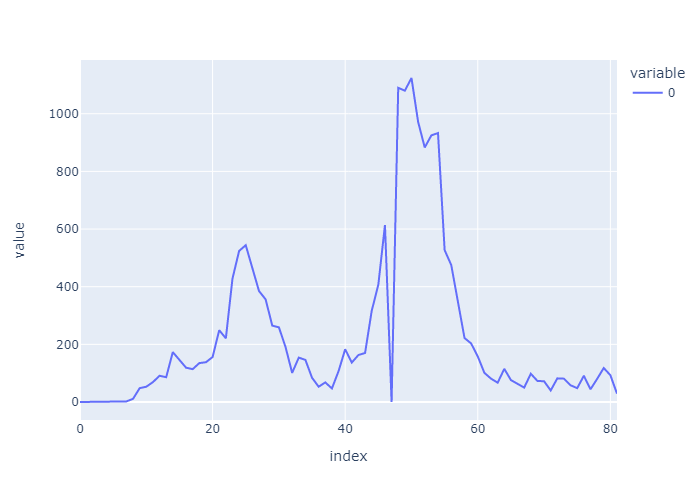

In [48]:
AZ_week_deaths = AZ_new_deaths.groupby([[i//7 for i in range(0, 568)]], axis = 1).sum()
AZ_week_deaths = pd.DataFrame(AZ_week_deaths.sum())
fig = AZ_week_deaths.plot()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

So if our maximum number of beds in Arizona is 5028, it seems that Arizona never hit their point of no return. They might have felt the most pressure around week 48, where they were having over a thousand deaths in that week and the one following. But with 5000 beds available it seems that they would have been able to handle 1000 deaths. 

### Perform hypothesis tests on questions identified in Stage III

- Do higher percentages of population over 18 lead to higher covid case numbers?
- Do higher percentages of population under 5 lead to higher covid case numbers?
- Do higher percentages of female population lead to higher covid case numbers?

Lets first input our demographic data and join it with our Arizona data. For easy comparison we will use the average amount of new cases per county. 

In [34]:
#reading demographic data
demographic = pd.read_csv("../../../../data/stage_1/acs demographic.csv", header = 1)
demographic.head()
#creating the index
demographic['id'] = (demographic['id'].str[-5:]).astype(int)

#Getting the average new cases per county 
AZ_avg_cases = pd.DataFrame(AZ_new_cases.mean(axis=1).round())
AZ_avg_cases.columns = ['AZ_cases_avg']

#joining all of the data
AZ_avg_cd_ = AZ_avg_cases.join(AZ_cases['countyFIPS'])
AZ_avg_cd_ = pd.merge(AZ_avg_cd_, demographic,left_on = 'countyFIPS', right_on= 'id', how = 'left')

#Dropping the counties if they have no demographic data
AZ_avg_cd_ = AZ_avg_cd_.dropna()
AZ_avg_cd_

,AZ_cases_avg,countyFIPS,Estimate Total population,Margin of Error Total population,Percent Total population,Percent Margin of Error Total population,Estimate Total population Male,Margin of Error Total population Male,Percent Total population Male,Percent Margin of Error Total population Male,...,"Estimate Citizen, 18 and over population Male","Margin of Error Citizen, 18 and over population Male","Percent Citizen, 18 and over population Male","Percent Margin of Error Citizen, 18 and over population Male","Estimate Citizen, 18 and over population Female","Margin of Error Citizen, 18 and over population Female","Percent Citizen, 18 and over population Female","Percent Margin of Error Citizen, 18 and over population Female",id,Geographic Area Name
0,21.0,4001,71887.0,*****,71887.0,(X),36435.0,626,50.7,0.9,...,26167.0,680.0,49.7,0.9,26483.0,428.0,50.3,0.9,4001.0,"Apache County, Arizona"
1,22.0,4003,125922.0,*****,125922.0,(X),64204.0,969,51.0,0.8,...,48203.0,1107.0,51.7,1.0,44991.0,1202.0,48.3,1.0,4003.0,"Cochise County, Arizona"
2,34.0,4005,143476.0,*****,143476.0,(X),71036.0,1057,49.5,0.7,...,55075.0,773.0,48.8,0.6,57851.0,779.0,51.2,0.6,4005.0,"Coconino County, Arizona"
7,1075.0,4013,4485414.0,*****,4485414.0,(X),2217116.0,479,49.4,0.1,...,1503528.0,8066.0,48.8,0.1,1578940.0,8232.0,51.2,0.1,4013.0,"Maricopa County, Arizona"
8,47.0,4015,212181.0,*****,212181.0,(X),106919.0,934,50.4,0.4,...,86451.0,1324.0,50.6,0.5,84552.0,1394.0,49.4,0.5,4015.0,"Mohave County, Arizona"
9,31.0,4017,110924.0,*****,110924.0,(X),54994.0,663,49.6,0.6,...,40165.0,452.0,50.0,0.4,40245.0,652.0,50.0,0.4,4017.0,"Navajo County, Arizona"
10,217.0,4019,1047279.0,*****,1047279.0,(X),516110.0,495,49.3,0.1,...,371071.0,4038.0,48.8,0.3,390039.0,3941.0,51.2,0.3,4019.0,"Pima County, Arizona"
11,105.0,4021,462789.0,*****,462789.0,(X),241369.0,889,52.2,0.2,...,178886.0,1803.0,52.7,0.4,160703.0,2146.0,47.3,0.4,4021.0,"Pinal County, Arizona"
13,39.0,4025,235099.0,*****,235099.0,(X),115634.0,813,49.2,0.3,...,92791.0,1479.0,49.0,0.6,96768.0,1568.0,51.0,0.6,4025.0,"Yavapai County, Arizona"
14,67.0,4027,213787.0,*****,213787.0,(X),110189.0,591,51.5,0.3,...,69067.0,2325.0,52.4,1.0,62733.0,1984.0,47.6,1.0,4027.0,"Yuma County, Arizona"


Do higher percentages of population over 18 lead to higher covid case numbers?
- Our null hypothesis is that that higher percentages of population over 18 have no effect on covid case numbers
- Our alternative is that higher percentages of population over 18 have an effect on covid case numbers

In [35]:
stats.ttest_ind(a= AZ_avg_cd_['AZ_cases_avg'],
                b= AZ_avg_cd_['Percent Total population 18 years and over'],
                equal_var=False)

Ttest_indResult(statistic=0.8523385281122106, pvalue=0.4161250012108232)

With a confidence level of 95%, We fail to reject the null hypothesis as the p-value is greater than an alpha of .05. Meaning we do not have significant evidence to conclude that higher percentages of population over 18 in Arizona lead to higher covid case numbers

Do higher percentages of population under 5 lead to higher covid case numbers?
- Our null hypothesis is that that higher percentages of population under 5 have no effect on covid case numbers
- Our alternative is that higher percentages of population under 5 have an effect on covid case numbers

In [36]:
stats.ttest_ind(a= AZ_avg_cd_['AZ_cases_avg'],
                b= AZ_avg_cd_['Percent Total population Under 5 years'],
                equal_var=False)

Ttest_indResult(statistic=1.5595685163673603, pvalue=0.15329193326908505)

With a confidence level of 95%, We fail to reject the null hypothesis as the p-value is greater than an alpha of .05. Meaning we do not have significant evidence to conclude that higher percentages of population under 5 in Arizona lead to higher covid case numbers

Do higher percentages of female population lead to higher covid case numbers?
- Our null hypothesis is that that higher percentages of female population have no effect on covid case numbers
- Our alternative is that higher percentages of female population have an effect on covid case numbers

In [37]:
stats.ttest_ind(a= AZ_avg_cd_['AZ_cases_avg'],
                b= AZ_avg_cd_['Percent Total population Female'],
                equal_var=False)

Ttest_indResult(statistic=1.1297722930397065, pvalue=0.2877816827166813)

With a confidence level of 95%, We fail to reject the null hypothesis as the p-value is greater than an alpha of .05. Meaning we do not have significant evidence to conclude that higher percentages of female population in Arizona lead to higher covid case numbers

## Task 2: (30 pts)
Member:
For each of the aforemention analysis plot graphs,
trend line
confidence intervals (error in prediction)
prediction path (forecast)

### Regression plots 

### Linear

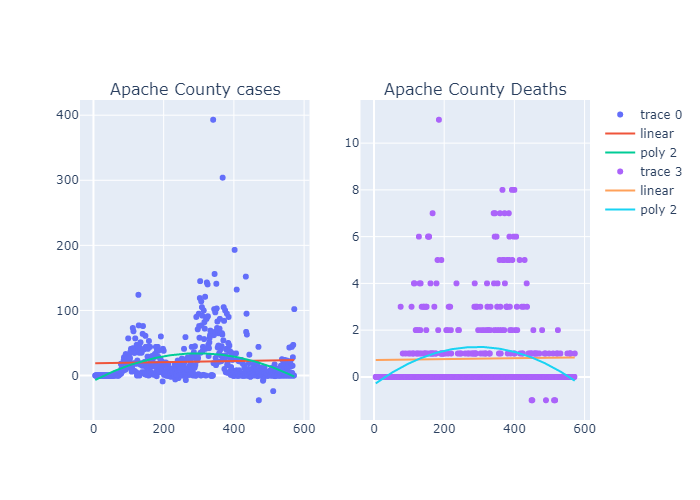

In [47]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("Apache County cases", "Apache County Deaths"))

#Cases
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x=data_c.index, y=data_c[99], mode='markers'),row = 1, col = 1)
#making the prediction range 
x = pd.DataFrame({'data_c.index': np.linspace(data_c.index.min(), data_c.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_c.index, y = apache_rg_c.predict(x), name = 'linear'),row = 1, col = 1)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_c.index, y = apache_poly_c.predict(x), name = 'poly 2'), row = 1, col = 1)

#deaths
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x= data_d.index, y=data_d[99], mode='markers'),row = 1, col = 2)
#making the prediction range 
x = pd.DataFrame({'data_d.index': np.linspace(data_d.index.min(), data_d.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_d.index, y = apache_rg_d.predict(x), name = 'linear'),row = 1, col = 2)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_d.index, y = apache_poly_2_d.predict(x), name = 'poly 2'), row = 1, col = 2)
img_bytes = fig.to_image(format="png")
Image(img_bytes)


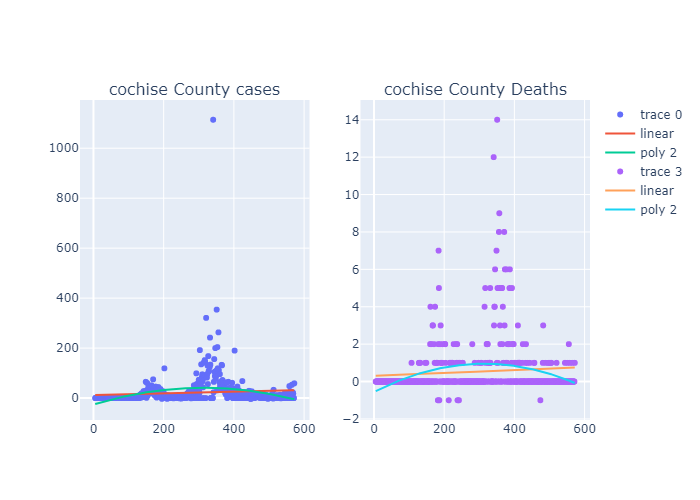

In [46]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("cochise County cases", "cochise County Deaths"))

#Cases
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x=data_c.index, y=data_c[100], mode='markers'),row = 1, col = 1)
#making the prediction range 
x = pd.DataFrame({'data_c.index': np.linspace(data_c.index.min(), data_c.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_c.index, y = cochise_rg_c.predict(x), name = 'linear'),row = 1, col = 1)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_c.index, y = cochise_poly_c.predict(x), name = 'poly 2'), row = 1, col = 1)

#deaths
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x= data_d.index, y=data_d[100], mode='markers'),row = 1, col = 2)
#making the prediction range 
x = pd.DataFrame({'data_d.index': np.linspace(data_d.index.min(), data_d.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_d.index, y = cochise_rg_d.predict(x), name = 'linear'),row = 1, col = 2)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_d.index, y = cochise_poly_2_d.predict(x), name = 'poly 2'), row = 1, col = 2)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

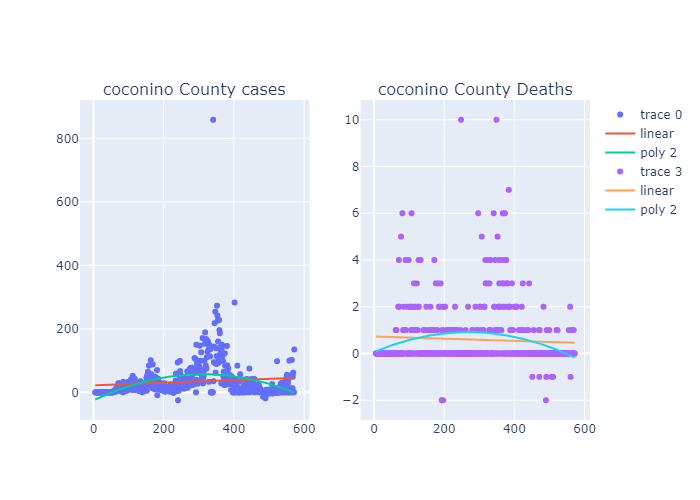

In [45]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("coconino County cases", "coconino County Deaths"))

#Cases
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x=data_c.index, y=data_c[101], mode='markers'),row = 1, col = 1)
#making the prediction range 
x = pd.DataFrame({'data_c.index': np.linspace(data_c.index.min(), data_c.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_c.index, y = coconino_rg_c.predict(x), name = 'linear'),row = 1, col = 1)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_c.index, y = coconino_poly_c.predict(x), name = 'poly 2'), row = 1, col = 1)

#deaths
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x= data_d.index, y=data_d[101], mode='markers'),row = 1, col = 2)
#making the prediction range 
x = pd.DataFrame({'data_d.index': np.linspace(data_d.index.min(), data_d.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_d.index, y = coconino_rg_d.predict(x), name = 'linear'),row = 1, col = 2)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_d.index, y = coconino_poly_2_d.predict(x), name = 'poly 2'), row = 1, col = 2)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

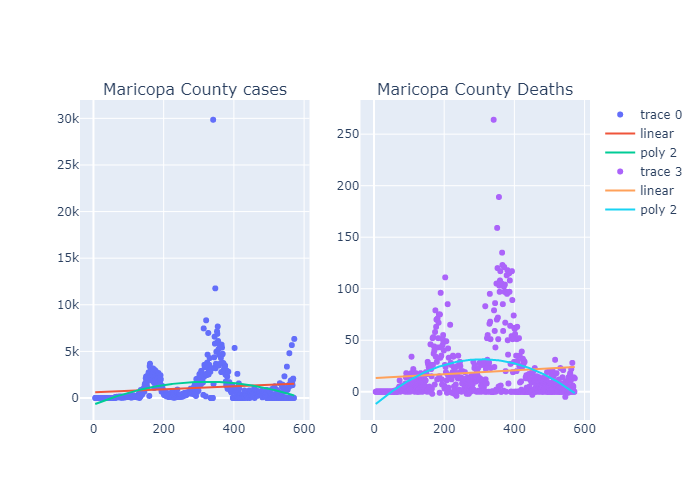

In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Maricopa County cases", "Maricopa County Deaths"))

#Cases
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x=data_c.index, y=data_c[106], mode='markers'),row = 1, col = 1)
#making the prediction range 
x = pd.DataFrame({'data_c.index': np.linspace(data_c.index.min(), data_c.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_c.index, y = Maricopa_rg_c.predict(x), name = 'linear'),row = 1, col = 1)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_c.index, y = Maricopa_poly_c.predict(x), name = 'poly 2'), row = 1, col = 1)

#deaths
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x= data_d.index, y=data_d[106], mode='markers'),row = 1, col = 2)
#making the prediction range 
x = pd.DataFrame({'data_d.index': np.linspace(data_d.index.min(), data_d.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_d.index, y = Maricopa_rg_d.predict(x), name = 'linear'),row = 1, col = 2)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_d.index, y = Maricopa_poly_2_d.predict(x), name = 'poly 2'), row = 1, col = 2)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

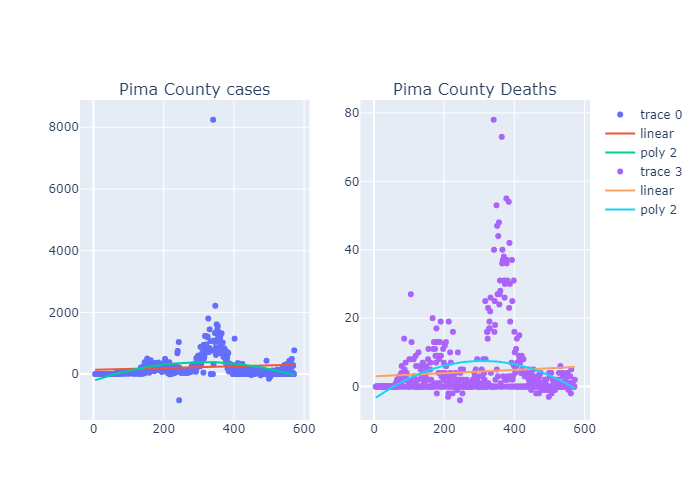

In [43]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Pima County cases", "Pima County Deaths"))

#Cases
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x=data_c.index, y=data_c[109], mode='markers'),row = 1, col = 1)
#making the prediction range 
x = pd.DataFrame({'data_c.index': np.linspace(data_c.index.min(), data_c.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_c.index, y = Pima_rg_c.predict(x), name = 'linear'),row = 1, col = 1)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_c.index, y = Pima_poly_c.predict(x), name = 'poly 2'), row = 1, col = 1)

#deaths
#plotting just the scatter plot 
fig.add_trace(go.Scatter(x= data_d.index, y=data_d[109], mode='markers'),row = 1, col = 2)
#making the prediction range 
x = pd.DataFrame({'data_d.index': np.linspace(data_d.index.min(), data_d.index.max(), 568)})
#plotting the linear predictions
fig.add_trace(go.Scatter(x = data_d.index, y = Pima_rg_d.predict(x), name = 'linear'),row = 1, col = 2)
#polynomial predictions
fig.add_trace(go.Scatter(x = data_d.index, y = Pima_poly_2_d.predict(x), name = 'poly 2'), row = 1, col = 2)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Overall all of these graphs show that the polynomial regression models fit the data beter than the linear regression model. With the polunomial models we have low bias and moderate variance